In [1]:
import numpy as np
import pandas as pd

In [2]:
y = pd.read_csv("10.30_port.csv") 
y.head(10)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_CORR,TR_SEQNUM,TR_SOURCE,TR_RF
0,20181031,9:30:01.004813000,N,A,NaN,O,13367,64.35,0,355501,C,NaN
1,20181031,9:30:01.147792000,N,A,NaN,F I,65,64.55,0,370201,C,NaN
2,20181031,9:30:01.190804000,D,A,NaN,I,5,64.52,0,370801,C,T
3,20181031,9:30:01.469860000,N,A,NaN,F,100,64.47,0,375101,C,NaN
4,20181031,9:30:01.640534000,D,A,NaN,I,6,64.46,0,376101,C,T
5,20181031,9:30:09.071241000,D,A,NaN,I,1,64.35,0,428901,C,T
6,20181031,9:30:21.508384000,D,A,NaN,4 I,1,64.35,0,489201,C,T
7,20181031,9:30:30.013184000,J,A,NaN,NaN,100,64.37,0,540501,C,NaN
8,20181031,9:30:30.019947000,J,A,NaN,I,4,64.39,0,540701,C,NaN
9,20181031,9:30:35.012327000,T,A,NaN,NaN,100,64.20,0,566401,C,NaN


In [3]:
T1 = [[] for _ in range(13)]
volume=[[] for _ in range(13)]
k=0
for j in y["SYM_ROOT"].unique():
    T1[k]=[]
    volume[k]=[]
    for i in range(len(y["TIME_M"])):
        if y["SYM_ROOT"][i] == j:
            if T1[k] == []:
                T1[k].append(y["TIME_M"][i][:5])
                volume[k].append(y["SIZE"][i])
            elif y["TIME_M"][i][:5] == T1[k][-1]:
                volume[k][-1] += y["SIZE"][i]
            else:
                T1[k].append(y["TIME_M"][i][:5])
                volume[k].append(y["SIZE"][i])
        else:
            pass
    k+=1

In [4]:
t = []
vol = [[] for _ in range(13)]
for j in range(13):
    for i in range(0,390,5):
        vol[j].append(np.sum(volume[j][i:i+5]))
for i in range(0,390,5):
        t.append(T1[0][i])

In [5]:
symbol=['A', 'AAPL', 'ADI', 'ADP', 'CRM', 'CVS', 'DF', 'EW', 'GE', 'GOOG',
        'IBM', 'MSFT', 'V']
table=pd.DataFrame(index=t,columns=symbol)
table.head()
len(vol),len(t)

(13, 78)

In [6]:
k=0
for i in y["SYM_ROOT"].unique():
    table[i]=vol[k]
    k+=1

In [7]:
table.head()

,A,AAPL,ADI,ADP,CRM,CVS,DF,EW,GE,GOOG,IBM,MSFT,V
9:30:,32887,1973358,124238,159332,171911,180339,34048,59208,6192176,150312,459736,3124793,437572
9:35:,31773,956465,169561,88909,85950,268919,38108,58133,3127005,82578,302009,1806670,326645
9:40:,27233,724810,77393,62311,117332,127523,11747,19445,4274173,137380,209605,1149928,338841
9:45:,37414,495944,60422,86065,125575,95077,14336,19608,2700807,84962,321531,1026095,222433
9:50:,23286,528442,38476,61420,102183,107093,8325,17272,3341987,44591,320309,935168,271523


PCA decomposition
$x_{i,t} = c_{i,t} + y_{i,t}$
where
$c_{i,t} =  \bar x_i + \frac{1}{\lambda_1} Cov(x_{i,t}, {C_t}^1){C_t}^1$
$y_{i,t} = \sum_{k>1}{\frac{1}{\lambda_k} Cov(x_{i,t}, {C_t}^k){C_t}^k}$

In [45]:
from sklearn.decomposition import PCA

In [46]:
vol=np.array(vol)
pca=PCA()
pca.fit(table)
print(np.cumsum(pca.explained_variance_ratio_))

[0.8667022  0.9867969  0.99205453 0.9965099  0.99809075 0.99875918
 0.99919163 0.99949387 0.99968393 0.99980789 0.99989322 0.99996003
 1.        ]


In [47]:
u = pca.components_
lmb = pca.singular_values_
x = np.array(table[0:])
C = np.dot(x, u)
C = C.T

In [48]:
C.shape, x.shape

((13, 78), (78, 13))

In [49]:
lmb

array([10435980.52714274,  3884724.55998172,   812817.79858447,
         748238.67973749,   445701.05786255,   289819.18913594,
         233111.16908195,   194885.32606832,   154537.60574114,
         124807.7775922 ,   103554.65078422,    91620.9875557 ,
          70873.06831218])

In [50]:
x[:,0]

array([ 32887,  31773,  27233,  37414,  23286,  33895,  17366,  22838,
        24479,  24733,  30897,  37426,  39323,  56068,  56787,  68369,
        67247,  34620,  42257,  56694,  36558,  24354,  82559,  39382,
        38999,  41971,  32229,  28620,  30490, 135997,  58581,  36129,
        26248,  32231,  24681,  24124,  32006,  36743,  22858,  25784,
        17432,  22501,  47291,  58907,  69389,  28946,  24908,  52546,
        15745,  16310,  19471,  53754,  27571,  33393,  22242,  30238,
        32850,  31997,  33673,  35309,  37923,  30842,  24429,  47465,
        77617,  34524,  47665, 131008,  25782,  31902,  51488,  32970,
        51649,  53002,  64114, 105716,  89346, 233258])

In [51]:
np.cov(x[:,0],C[0])

array([[ 1.00260704e+09, -2.03040374e+08],
       [-2.03040374e+08,  3.54186540e+10]])

In [52]:
c_A=np.mean(x[:,0])+1/lmb[0]*np.cov(x[:,0],C[0])[0][1]*C[0]
c_A.shape

(78,)

In [62]:
y=np.zeros(78)
for i in range(12):
    y+=1/lmb[i+1]*np.cov(x_A,C[i+1])[1][0]*C[i+1]
y

array([2.99489736e+11, 1.63158080e+11, 1.43242698e+11, 1.09687110e+11,
       1.16706282e+11, 1.05329458e+11, 1.04493386e+11, 8.63673623e+10,
       1.26069448e+11, 1.13324721e+11, 1.26211896e+11, 8.37836572e+10,
       8.74587480e+10, 1.01102536e+11, 6.47005587e+10, 8.80447836e+10,
       7.36467227e+10, 8.66136550e+10, 8.59349426e+10, 1.04536011e+11,
       9.81379667e+10, 8.27510212e+10, 1.10774415e+11, 7.50906875e+10,
       6.41284626e+10, 5.81391233e+10, 5.38949736e+10, 6.92739835e+10,
       5.46197737e+10, 5.16249123e+10, 4.03793649e+10, 5.87448754e+10,
       4.86339060e+10, 7.08466549e+10, 8.25952520e+10, 7.91722405e+10,
       7.23201584e+10, 5.30243233e+10, 6.83002599e+10, 4.92662029e+10,
       6.58805897e+10, 5.84403395e+10, 4.69086964e+10, 8.71491638e+10,
       9.15026472e+10, 4.75679719e+10, 5.96081065e+10, 4.63585869e+10,
       5.48611086e+10, 6.19245915e+10, 5.01518034e+10, 6.46746259e+10,
       3.69879533e+10, 3.67693706e+10, 4.83477749e+10, 4.24980548e+10,
      

In [81]:
from statsmodels.tsa.arima_model import ARMA
from matplotlib import pyplot as plt
%matplotlib inline

In [82]:
model = ARMA(y, order=(1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   78
Model:                     ARMA(1, 1)   Log Likelihood               -1992.314
Method:                       css-mle   S.D. of innovations    29458453619.983
Date:                Fri, 19 Apr 2019   AIC                           3992.628
Time:                        22:59:10   BIC                           4002.055
Sample:                             0   HQIC                          3996.402
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.813e+10        nan        nan        nan         nan         nan
ar.L1.y        0.9738        nan        nan        nan         nan         nan
ma.L1.y       -0.1340      0.147     -0.913      0.3

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


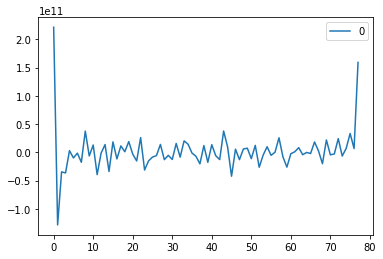

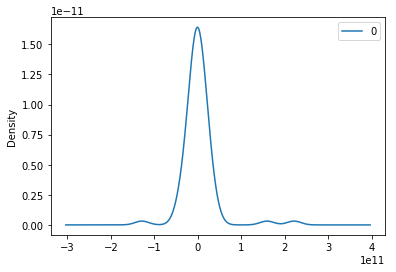

                  0
count  7.800000e+01
mean   2.102372e+09
std    3.835332e+10
min   -1.284940e+11
25%   -1.155643e+10
50%   -1.785335e+09
75%    1.218438e+10
max    2.213637e+11


In [83]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [84]:
forecast = model_fit.forecast(steps=78)[0]
forecast

array([2.47486733e+11, 2.43043241e+11, 2.38716332e+11, 2.34502947e+11,
       2.30400109e+11, 2.26404916e+11, 2.22514544e+11, 2.18726244e+11,
       2.15037336e+11, 2.11445214e+11, 2.07947338e+11, 2.04541236e+11,
       2.01224498e+11, 1.97994782e+11, 1.94849803e+11, 1.91787339e+11,
       1.88805224e+11, 1.85901350e+11, 1.83073665e+11, 1.80320169e+11,
       1.77638917e+11, 1.75028012e+11, 1.72485609e+11, 1.70009910e+11,
       1.67599167e+11, 1.65251673e+11, 1.62965771e+11, 1.60739843e+11,
       1.58572317e+11, 1.56461660e+11, 1.54406380e+11, 1.52405024e+11,
       1.50456177e+11, 1.48558462e+11, 1.46710537e+11, 1.44911095e+11,
       1.43158866e+11, 1.41452609e+11, 1.39791119e+11, 1.38173222e+11,
       1.36597773e+11, 1.35063659e+11, 1.33569795e+11, 1.32115125e+11,
       1.30698622e+11, 1.29319283e+11, 1.27976134e+11, 1.26668224e+11,
       1.25394630e+11, 1.24154451e+11, 1.22946811e+11, 1.21770855e+11,
       1.20625753e+11, 1.19510694e+11, 1.18424892e+11, 1.17367577e+11,
      

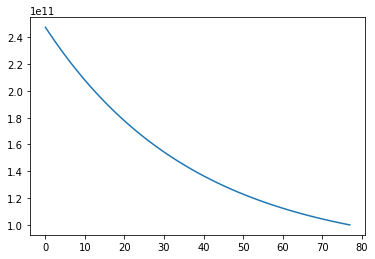

In [86]:
plt.plot(forecast)
plt.show()

In [87]:
x_A_pre=c_A+forecast

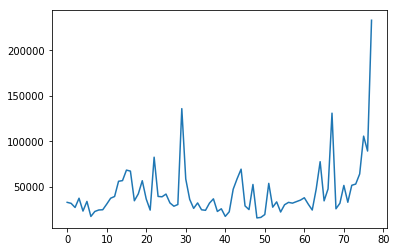

In [88]:
plt.plot(x_A)
plt.show()

In [89]:
df = pd.read_csv("11.1_A.csv") 
df.head(10)

,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_CORR,TR_SEQNUM,TR_SOURCE,TR_RF
0,20181101,9:30:01.003621000,N,A,NaN,O,20075,65.070,0,466501,C,NaN
1,20181101,9:30:01.446887000,D,A,NaN,NaN,526,65.115,0,482901,C,T
2,20181101,9:30:01.447739000,D,A,NaN,NaN,600,65.115,0,483001,C,T
3,20181101,9:30:01.450569000,X,A,NaN,I,43,65.460,0,483101,C,NaN
4,20181101,9:30:01.453111000,X,A,NaN,I,34,65.460,0,483201,C,NaN
5,20181101,9:30:02.922104000,Y,A,NaN,F I,3,65.000,0,508801,C,NaN
6,20181101,9:30:02.926559000,Y,A,NaN,F I,4,65.000,0,508901,C,NaN
7,20181101,9:30:02.961304000,Y,A,NaN,F I,17,65.000,0,510701,C,NaN
8,20181101,9:30:03.684904000,V,A,NaN,NaN,300,65.130,0,531901,C,NaN
9,20181101,9:30:03.983407000,N,A,NaN,NaN,100,65.200,0,533201,C,NaN


In [90]:
T1 = []
volume=[]
for i in range(len(df["TIME_M"])):
    if T1 == []:
        T1.append(df["TIME_M"][i][:5])
        volume.append(df["SIZE"][i])
    elif df["TIME_M"][i][:5] == T1[-1]:
        volume[-1] += df["SIZE"][i]
    else:
        T1.append(df["TIME_M"][i][:5])
        volume.append(df["SIZE"][i])


In [91]:
vol = []
for i in range(0,390,5):
        vol.append(np.sum(volume[i:i+5]))

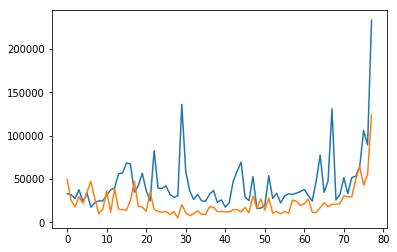

In [97]:
plt.plot(x_A,label='pre')
plt.plot(vol,label='true')
plt.show()